***Introduction notebook2: All images were processed to standardize the input for CNN training Notebook 2)(Bruijne, M. ,2022) (Figure 6):
1-	Resized to a consistent spatial resolution of 224x224
2-	Converted to grayscale, a single channel to simplify the input and reduce computational load
3-	Normalized to the [0,1] to stabilize training and reduce the sensitivity for specific variations. The preprocessed images were saved, and the dataset files were updated accordingly
4- spliting of dataset

***Main action :preprocess the training image --->save them to (preprocessed_training_images)-----> same as for test , then save the image to (preprocessed_test image_images)----> update the path for the image in both (training_samples.csv,test_samples.csv) by adding new column weith preprocess- path ----> split the(training_samples.csv) 80/20 and save to ("training_split.csv","validation_split.csv")

In [ ]:

from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


Preprocess the training images:
convert them to grayscale,
resize them to a standard size (224×224),
normalize their pixel values,
and save them to a new folder




In [ ]:
'''We will generate a mammography image pre-processing pipeline,
as apart of preparing the dataset for deep learning process in the next notebook'''
# import the needed library
import os
import pandas as pd
from PIL import Image
import numpy as np # this for manipulate image arrays and normalize pixel values

# prepare the files

csv_path = "/content/drive/MyDrive/VinDr_mammo.png/training_samples.csv"
save_folder = "/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/"
os.makedirs(save_folder, exist_ok=True)
df = pd.read_csv(csv_path)
#to resize the image to to 224×224 pixels(a standard input size for CNN models)

TARGET_SIZE = (224, 224)
# resize loop
for idx, row in df.iterrows():
    img_path = row['image_path_in_zip']
    filename = os.path.basename(img_path)
    save_path = os.path.join(save_folder, filename)

#if image has already been processed, skip it
    if os.path.exists(save_path):
        continue

    try:

        img = Image.open(img_path)
        img = img.convert('L')  # grayscale (single channel)

        img_resized = img.resize(TARGET_SIZE)

        # Normalize (Converts image to a NumPy array and normalizes pixel values to [0,1])+ save
        img_array = np.array(img_resized) / 255.0
        img_final = Image.fromarray((img_array * 255).astype(np.uint8))#Converts back to 8-bit image (0–255)
        img_final.save(save_path)

        if idx % 100 == 0:
            print(f"Processed {idx} images...")# to show progress

    except Exception as e:
        print(f"⚠️ Skipped {img_path}: {e}")
        continue

print("✅ Preprocessing complete (skipped slow or corrupted images).")


Processed 14400 images...
Processed 14500 images...
Processed 14600 images...
Processed 14700 images...
Processed 14800 images...
Processed 14900 images...
Processed 15000 images...
Processed 15100 images...
Processed 15200 images...
Processed 15300 images...
Processed 15400 images...
Processed 15500 images...
Processed 15600 images...
Processed 15700 images...
Processed 15800 images...
Processed 15900 images...
✅ Preprocessing complete (skipped slow or corrupted images).


Explore and pre-process the test image similar to the training image and save them

In [ ]:
# check the test file contents and structure before preprocessing


test_output_path = "/content/drive/MyDrive/VinDr_mammo.png/test_samples.csv"

test_df = pd.read_csv(test_output_path)

# Show first few rows
print(test_df.head())

# Show number of rows and columns
print("\n✅ File loaded successfully!")
print(f"Rows: {len(test_df)}, Columns: {len(test_df.columns)}")

#  list the column names to make sure same as training
print("\nColumns:", test_df.columns.tolist())

                           study_id                         series_id  \
0  522963c771a84cb777c49ba7a4ca69fc  758269b5ed353cb326e5d450815e8318   
1  522963c771a84cb777c49ba7a4ca69fc  758269b5ed353cb326e5d450815e8318   
2  522963c771a84cb777c49ba7a4ca69fc  758269b5ed353cb326e5d450815e8318   
3  522963c771a84cb777c49ba7a4ca69fc  758269b5ed353cb326e5d450815e8318   
4  229b0c72152c8c7c6cd902876046c795  ba77420116a36fd24c151e4294114ab3   

                           image_id laterality view_position  height  width  \
0  04c9b9305ae9a552975cceab2c15632e          L            CC    3518   2800   
1  a0b73dcf1c300988780abb9abe55826d          L           MLO    3518   2800   
2  8132013f5158a2bc93d77ea9200c75d8          R            CC    3518   2800   
3  09c140f91b2da7c7ff024e5f4b2d5599          R           MLO    3518   2800   
4  b045e8b4cbcacce80adb90ee8a9f885a          L            CC    3518   2800   

  breast_birads breast_density split  ... Window Center  Window Width  \
0     BI-RADS

In [ ]:
# reload the file

csv_path = "/content/drive/MyDrive/VinDr_mammo.png/test_samples.csv"
df = pd.read_csv(csv_path)

# Check first few image paths
print(df['image_path_in_zip'].head())

# Check if the first few image files actually exist
for path in df['image_path_in_zip'].head(10):
    if os.path.exists(path):
        print(f"✅ Found: {path}")
    else:
        print(f"❌ Not found: {path}")


0    /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...
1    /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...
2    /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...
3    /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...
4    /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...
Name: image_path_in_zip, dtype: object
✅ Found: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/04c9b9305ae9a552975cceab2c15632e.png
✅ Found: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/a0b73dcf1c300988780abb9abe55826d.png
✅ Found: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/8132013f5158a2bc93d77ea9200c75d8.png
✅ Found: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/09c140f91b2da7c7ff024e5f4b2d5599.png
✅ Found: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/229b0c72152c8c7c6cd902876046c795/b045e8b4cbcacce80adb90ee8a9f

In [ ]:
from PIL import Image

# Take first few images as example for dimention and colour
for path in df['image_path_in_zip'].head(5):
    img = Image.open(path)
    print(f"Image: {path}")
    print(f"  Size (width x height): {img.size}")
    print(f"  Mode (channels): {img.mode}")
    print()

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/04c9b9305ae9a552975cceab2c15632e.png
  Size (width x height): (912, 1520)
  Mode (channels): L

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/a0b73dcf1c300988780abb9abe55826d.png
  Size (width x height): (912, 1520)
  Mode (channels): L

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/8132013f5158a2bc93d77ea9200c75d8.png
  Size (width x height): (912, 1520)
  Mode (channels): L

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/09c140f91b2da7c7ff024e5f4b2d5599.png
  Size (width x height): (912, 1520)
  Mode (channels): L

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/229b0c72152c8c7c6cd902876046c795/b045e8b4cbcacce80adb90ee8a9f885a.png
  Size (width x height): (912, 1520)
  Mode (channels): L



In [ ]:
#checking pixel intensity values

for path in df['image_path_in_zip'].head(5):
    img = Image.open(path)
    arr = np.array(img)
    print(f"Image: {path}")
    print(f"  Min pixel value: {arr.min()}")
    print(f"  Max pixel value: {arr.max()}")
    print()

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/04c9b9305ae9a552975cceab2c15632e.png
  Min pixel value: 0
  Max pixel value: 224

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/a0b73dcf1c300988780abb9abe55826d.png
  Min pixel value: 0
  Max pixel value: 228

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/8132013f5158a2bc93d77ea9200c75d8.png
  Min pixel value: 0
  Max pixel value: 232

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/522963c771a84cb777c49ba7a4ca69fc/09c140f91b2da7c7ff024e5f4b2d5599.png
  Min pixel value: 0
  Max pixel value: 226

Image: /content/drive/MyDrive/VinDr_mammo.png/VinDr_mammo_unzipped/229b0c72152c8c7c6cd902876046c795/b045e8b4cbcacce80adb90ee8a9f885a.png
  Min pixel value: 0
  Max pixel value: 190



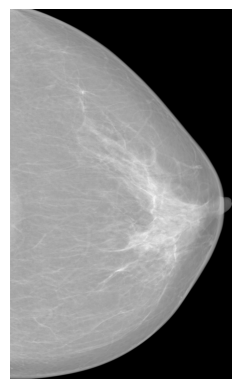

In [ ]:
#show image
import matplotlib.pyplot as plt

img = Image.open(df['image_path_in_zip'].iloc[0])
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
# preprocess the test dataset same as training
import os
import pandas as pd
from PIL import Image
import numpy as np

csv_path = "/content/drive/MyDrive/VinDr_mammo.png/test_samples.csv"
save_folder = "/content/drive/MyDrive/VinDr_mammo.png/preprocessed_test_images/"

# Create folder
os.makedirs(save_folder, exist_ok=True)

df = pd.read_csv(csv_path)

# resize
TARGET_SIZE = (224, 224)  # (width, height)


# Process each image

for idx, row in df.iterrows():
    img_path = row['image_path_in_zip']
    filename = os.path.basename(img_path)
    save_path = os.path.join(save_folder, filename)

    #  Skip if already processed
    if os.path.exists(save_path):
        continue

    try:
        # Open image
        img = Image.open(img_path).convert('L')  # ensure grayscale

        # Resize
        img_resized = img.resize(TARGET_SIZE)

        # Normalize pixels to [0,1]
        img_array = np.array(img_resized) / 255.0

        # Convert back to PIL image for saving
        img_final = Image.fromarray((img_array * 255).astype(np.uint8))

        # Save with same filename in new folder
        img_final.save(save_path)

        if idx % 500 == 0:
            print(f"Processed {idx} images...")

    except Exception as e:
        print(f"Error processing {img_path}: {e}")

print("✅ Preprocessing complete (skipped existing images).")
print(f"All preprocessed images saved in: {save_folder}")


Processed 0 images...
Processed 500 images...
Processed 1000 images...
Processed 1500 images...
Processed 2000 images...
Processed 2500 images...
Processed 3000 images...
Processed 3500 images...
✅ Preprocessing complete (skipped existing images).
All preprocessed images saved in: /content/drive/MyDrive/VinDr_mammo.png/preprocessed_test_images/


In [ ]:
import os
test_image = "/content/drive/MyDrive/VinDr_mammo.png/preprocessed_test_images/"

# check all files in the folder
files = [f for f in os.listdir(test_image) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

print(f"Total preprocessed images: {len(files)}")

Total preprocessed images: 4000


In [ ]:
import os
import pandas as pd

# Paths
csv_path = "/content/drive/MyDrive/VinDr_mammo.png/test_samples.csv"
preprocessed_folder = "/content/drive/MyDrive/VinDr_mammo.png/preprocessed_test_images/"

# Load the CSV
df = pd.read_csv(csv_path)

In [ ]:
df.shape

(4000, 32)

Update the path for the image by adding extra column (preprocessed_path) for both test and train file

In [ ]:
# Add new column for preprocessed images
df['preprocessed_path'] = df['image_path_in_zip'].apply(
    lambda x: os.path.join(preprocessed_folder, os.path.basename(x))
)

In [ ]:
df.shape

(4000, 32)

In [ ]:
#  Save it back to the same CSV file
df.to_csv(csv_path, index=False)

print("✅ Added 'preprocessed_path' column and saved to the same CSV file!")
print(df.head())

✅ Added 'preprocessed_path' column and saved to the same CSV file!
                           study_id                         series_id  \
0  522963c771a84cb777c49ba7a4ca69fc  758269b5ed353cb326e5d450815e8318   
1  522963c771a84cb777c49ba7a4ca69fc  758269b5ed353cb326e5d450815e8318   
2  522963c771a84cb777c49ba7a4ca69fc  758269b5ed353cb326e5d450815e8318   
3  522963c771a84cb777c49ba7a4ca69fc  758269b5ed353cb326e5d450815e8318   
4  229b0c72152c8c7c6cd902876046c795  ba77420116a36fd24c151e4294114ab3   

                           image_id laterality view_position  height  width  \
0  04c9b9305ae9a552975cceab2c15632e          L            CC    3518   2800   
1  a0b73dcf1c300988780abb9abe55826d          L           MLO    3518   2800   
2  8132013f5158a2bc93d77ea9200c75d8          R            CC    3518   2800   
3  09c140f91b2da7c7ff024e5f4b2d5599          R           MLO    3518   2800   
4  b045e8b4cbcacce80adb90ee8a9f885a          L            CC    3518   2800   

  breast_birads bre

In [ ]:
# the same for the training we will add the path for reprocessed image

import os
import pandas as pd

# Paths
csv_path = "/content/drive/MyDrive/VinDr_mammo.png/training_samples.csv"
save_folder = "/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/"

# Load CSV
df = pd.read_csv(csv_path)

In [ ]:
df.shape

(16000, 32)

In [ ]:

df['preprocessed_path'] = df['image_path_in_zip'].apply(
    lambda x: os.path.join(save_folder, os.path.basename(x))
)

# Save updated CSV
df.to_csv(csv_path, index=False)

In [ ]:
df.shape

(16000, 32)

In [ ]:
print("✅ Added 'preprocessed_path' column to training_samples.csv")
print("Sample rows:")
print(df[['image_path_in_zip', 'preprocessed_path']].head())

✅ Added 'preprocessed_path' column to training_samples.csv
Sample rows:
                                   image_path_in_zip  \
0  /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...   
1  /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...   
2  /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...   
3  /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...   
4  /content/drive/MyDrive/VinDr_mammo.png/VinDr_m...   

                                   preprocessed_path  
0  /content/drive/MyDrive/VinDr_mammo.png/preproc...  
1  /content/drive/MyDrive/VinDr_mammo.png/preproc...  
2  /content/drive/MyDrive/VinDr_mammo.png/preproc...  
3  /content/drive/MyDrive/VinDr_mammo.png/preproc...  
4  /content/drive/MyDrive/VinDr_mammo.png/preproc...  


In [ ]:
df.shape

(16000, 32)

# Split the training to validation and training split we will consider the natural distribution of age and density (WITHOUT STRATIFICATION)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

csv_path = "/content/drive/MyDrive/VinDr_mammo.png/training_samples.csv"
save_folder = "/content/drive/MyDrive/VinDr_mammo.png/"

df = pd.read_csv(csv_path)

In [ ]:
df.columns

Index(['study_id', 'series_id', 'image_id', 'laterality', 'view_position',
       'height', 'width', 'breast_birads', 'breast_density', 'split',
       'Series Instance UID', 'Patient's Age', 'View Position',
       'Image Laterality', 'Photometric Interpretation', 'Rows', 'Columns',
       'Imager Pixel Spacing', 'Pixel Spacing', 'Pixel Padding Value',
       'Pixel Padding Range Limit', 'Window Center', 'Window Width',
       'Rescale Intercept', 'Rescale Slope', 'Rescale Type',
       'Window Center & Width Explanation', 'Manufacturer',
       'Manufacturer's Model Name', 'Age Group', 'image_path_in_zip',
       'preprocessed_path'],
      dtype='object')

In [ ]:
# Columns for reference and to be updated if difference
age_column = "Patient's Age"
density_column = "breast_density"
birads_column = 'breast_birads'

# --- Random 80/20 split (no stratification to keep the original distribution and dont adjust the bias if present in this level)
train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# --- Save the split CSVs
train_csv_path = os.path.join(save_folder, "training_split.csv")
val_csv_path = os.path.join(save_folder, "validation_split.csv")

In [ ]:
# Check the shape after spliting
print(f"Training set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")


Training set shape: (12800, 32)
Validation set shape: (3200, 32)
